A simple implementation of RGDR workflow.

In [72]:
import s2s.time
from pathlib import Path
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

1. Prepare calendar

In [6]:
calendar = s2s.time.AdventCalendar((8, 31), freq = "30d")

In [7]:
intervals = calendar.map_years(2010, 2012)
intervals

i_interval,0,1,2,3,4,5,6,7,8,9,10,11
anchor_year,,,,,,,,,,,,
2012,"(2012-08-01, 2012-08-31]","(2012-07-02, 2012-08-01]","(2012-06-02, 2012-07-02]","(2012-05-03, 2012-06-02]","(2012-04-03, 2012-05-03]","(2012-03-04, 2012-04-03]","(2012-02-03, 2012-03-04]","(2012-01-04, 2012-02-03]","(2011-12-05, 2012-01-04]","(2011-11-05, 2011-12-05]","(2011-10-06, 2011-11-05]","(2011-09-06, 2011-10-06]"
2011,"(2011-08-01, 2011-08-31]","(2011-07-02, 2011-08-01]","(2011-06-02, 2011-07-02]","(2011-05-03, 2011-06-02]","(2011-04-03, 2011-05-03]","(2011-03-04, 2011-04-03]","(2011-02-02, 2011-03-04]","(2011-01-03, 2011-02-02]","(2010-12-04, 2011-01-03]","(2010-11-04, 2010-12-04]","(2010-10-05, 2010-11-04]","(2010-09-05, 2010-10-05]"
2010,"(2010-08-01, 2010-08-31]","(2010-07-02, 2010-08-01]","(2010-06-02, 2010-07-02]","(2010-05-03, 2010-06-02]","(2010-04-03, 2010-05-03]","(2010-03-04, 2010-04-03]","(2010-02-02, 2010-03-04]","(2010-01-03, 2010-02-02]","(2009-12-04, 2010-01-03]","(2009-11-04, 2009-12-04]","(2009-10-05, 2009-11-04]","(2009-09-05, 2009-10-05]"


2. Load test data and resample data to match the calendar

In [2]:
path_to_data = Path("/home/yangliu/AI4S2S/proto/data")
xr_sst = xr.load_dataset(path_to_data / "sst_daily_1979-2018_5deg_Pacific_175_240E_25_50N.nc")
xr_tf = xr.load_dataset(path_to_data / "tf5_nc5_dendo_80d77.nc")


In [3]:
xr_sst

<xarray.Dataset>
Dimensions:    (time: 14600, latitude: 5, longitude: 13)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2018-12-31
  * latitude   (latitude) float64 47.5 42.5 37.5 32.5 27.5
  * longitude  (longitude) float64 177.5 182.5 187.5 192.5 ... 227.5 232.5 237.5
Data variables:
    sst        (time, latitude, longitude) float64 277.3 277.6 ... 292.5 291.8

In [9]:
# resample precursor variable
calendar.map_to_data(xr_sst)
xr_sst_resample = calendar.resample(xr_sst)
xr_sst_resample

<xarray.Dataset>
Dimensions:      (index: 468, latitude: 5, longitude: 13)
Coordinates:
  * index        (index) int64 0 1 2 3 4 5 6 7 ... 461 462 463 464 465 466 467
    anchor_year  (index) int64 1980 1980 1980 1980 1980 ... 2018 2018 2018 2018
    i_interval   (index) int64 0 1 2 3 4 5 6 7 8 9 10 ... 2 3 4 5 6 7 8 9 10 11
  * latitude     (latitude) float64 47.5 42.5 37.5 32.5 27.5
  * longitude    (longitude) float64 177.5 182.5 187.5 ... 227.5 232.5 237.5
Data variables:
    interval     (index) object (1980-08-01, 1980-08-31] ... (2017-09-05, 201...
    sst          (index, latitude, longitude) float64 284.2 284.6 ... 294.8

In [12]:
# resample target variable
calendar.map_to_data(xr_tf)
xr_tf_resample = calendar.resample(xr_tf)
xr_tf_resample

<xarray.Dataset>
Dimensions:      (index: 468, latitude: 41, longitude: 76, cluster: 6)
Coordinates:
  * index        (index) int64 0 1 2 3 4 5 6 7 ... 461 462 463 464 465 466 467
    anchor_year  (index) int64 1980 1980 1980 1980 1980 ... 2018 2018 2018 2018
    i_interval   (index) int64 0 1 2 3 4 5 6 7 8 9 10 ... 2 3 4 5 6 7 8 9 10 11
    tfreq        int64 5
    n_clusters   int64 6
  * longitude    (longitude) float64 225.0 226.0 227.0 ... 298.0 299.0 300.0
  * latitude     (latitude) float32 70.0 69.0 68.0 67.0 ... 33.0 32.0 31.0 30.0
    mask         (latitude, longitude) int8 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
  * cluster      (cluster) int64 1 2 3 4 5 6
Data variables:
    interval     (index) object (1980-08-01, 1980-08-31] ... (2017-09-05, 201...
    xrclustered  (index, latitude, longitude) float32 nan nan nan ... nan nan
    ts           (index, cluster) float64 0.1425 -1.565 2.076 ... -2.019 0.372
    q75tail      (index, cluster) float64 2.915 2.376 5.79 ... 4.952 2.908 3.208

3. RGDR operations

In [78]:
#assert np.all(xr_tf_resample.interval == xr_sst_resample.interval)

# 1 select training data

# ts should be 1-d timeseries
ts = xr_tf_resample.ts.sel(cluster=3)
field = xr_sst_resample.sst
print(field.shape)
# To be implemented: select target timeseries and lag shifted precursor (e.g. df_split)
# To be implemented: lag shifting 
lag = 0 # we now calculate lag 0 correlation map
ts_target_period = ts[::12] # Target: only August period (08-01, 08-31)
xr_tf_resample.interval[::12] # check if interval is correct (August)
field_lag_0 = field[::12] # Precursor field: only August period (08-01, 08-31) 


(468, 5, 13)


In [76]:
# 2 calculate correlation
from scipy.stats import pearsonr
def corr_map(field: xr.DataArray, ts: np.ndarray):
    '''
    Calculate correlation map between field and ts, with field being a 3-d data variable
    of shape (time, latitude, longitude), ts is the 1-dimensional target timeseries. 
    Gridcell timeseries with any NaN, will be set to NaN completely as scipy.stats.pearsonr 
    can not handle a timeseries with any NaNs.
    '''
    # reshape field to (time, space)
    orig_shape = field.shape
    field = np.reshape(field.values, (orig_shape[0],-1))

    # To be implemented: Check NaNs and max_lag beforehand
    correlation = np.zeros(field.shape[1])

    p_values = np.zeros(field.shape[1])

    # scipy.stats.pearsonr can not handle a timeseries with any NaNs
    field_nans = np.array([np.isnan(field[:,i]).any() for i in range(correlation.size)])
    nonans_gc = np.arange(0, field_nans.size)[field_nans==False]

    for i in nonans_gc:
        correlation[i], p_values[i] = pearsonr(ts,field[:,i])
        # restore original nans
        correlation[field_nans] = np.nan

    correlation = correlation.reshape(orig_shape[1:])
    p_values = p_values.reshape(orig_shape[1:])
    return correlation, p_values

correlation, p_values = corr_map(field=field_lag_0, ts=ts_target_period)


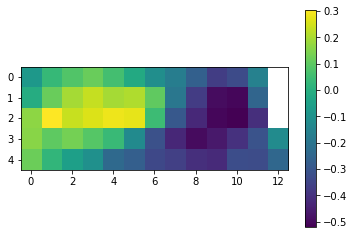

In [77]:
plt.imshow(correlation) ; plt.colorbar()

In [86]:
# 4 Cluster correlating region 
# Clustering is done with DBSCAN, and the distance metric is km (literally distance), calculated 
# by the haversine function (distance metric that takes into account curvature of the earth).
# by default we split the regions based on sign (positively and negatively correlation regions). 
# input data of function cluster_DBSCAN_regions should be xr.DataArray with shape (split, lag, latitude, longitude)

# to create empty xr.DataArray with right shape from input field:
lags = np.array([lag])
n_splits = 1
precur_arr = field_lag_0.copy() # Precursor field: only August period (08-01, 08-31) 
xrcorr = precur_arr.isel(index=0).drop('index').copy()
orig_mask = np.isnan(precur_arr[1]) # mask of first timestep? 
if 'lag' not in xrcorr.dims:
    # add lags
    list_xr = [xrcorr.expand_dims('lag', axis=0) for i in range(lags.size)]
    xrcorr = xr.concat(list_xr, dim = 'lag')
    xrcorr['lag'] = ('lag', lags)
# add train test split
list_xr = [xrcorr.expand_dims('split', axis=0) for i in range(n_splits)]
xrcorr = xr.concat(list_xr, dim = 'split')
xrcorr['split'] = ('split', range(n_splits))
xrpvals = xrcorr.copy()

In [93]:
# assign correlation value to xr.DataArray 
xrcorr[0,0] = correlation
xrpvals[0,0] = p_values
# create mask + add multiple hypothesis testing (from statsmodels)
# for simplicity
alpha = .05
# xrcorr['mask'] = p_values < alpha

In [91]:
# import clustering funtions
import s2s.cluster_regions

In [ ]:
prec_labels = cluster_DBSCAN_regions(corr_xr: xr.DataArray, 
                                    distance_eps: float=600, 
                                    min_area_in_degrees2: int=3,
                                    group_split: bool=False,
                                    group_lag: bool=True,
                                    n_jobs_clust: int=1)

                                